In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Логистическая регрессия

In [3]:
def sigmoid(z):                  # сигмоида
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=-Xw$')
plt.ylabel('p')
plt.grid();

In [4]:
def calc_logloss(y, y_pred):    # Исправлено. Логистическая функция потерь
    err = np.mean(- y * np.log(np.clip(y_pred, 0.0001, 0.9999)) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 0.0001, 0.9999)))
    return err

### Пример

In [5]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [6]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [41]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
    return w, err

In [112]:
w, err = eval_LR_model(X_st, y, 3000, 1e-2)

In [101]:
np.logspace(-4, 1, 6)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

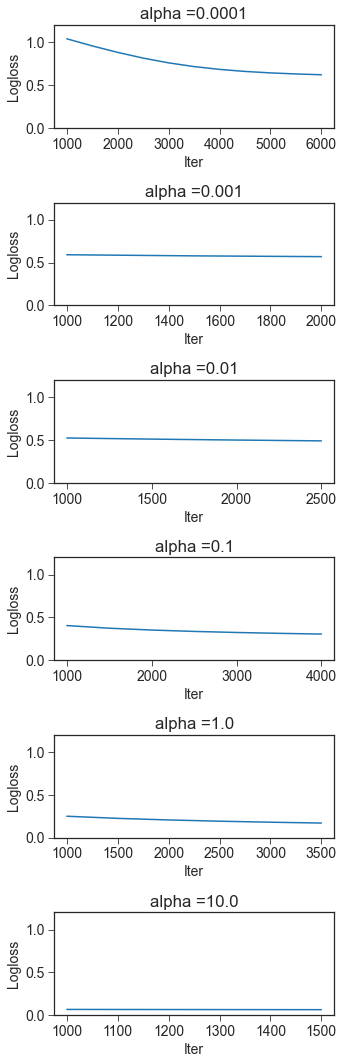

In [110]:
fig = plt.figure(figsize=(5,15))
total_axes = 6
subplt = 1

for alpha_ in np.logspace(-4, 1, 6):
    iter = 1000
    iters = []
    errors = []
    err_last = 0
    while True:
        w, err = eval_LR_model(X_st, y, iter, alpha_)
        iters.append(iter)
        errors.append(err)
        if abs(err-err_last) < 0.01:
            break
        else:
            err_last = err
            iter += 500
    ax = fig.add_subplot(total_axes, 1, subplt)
    plt.plot(iters, errors)
    plt.title('alpha ={alpha_}'.format(alpha_=alpha_))
    plt.ylabel('Logloss')
    plt.ylim(0, 1.2)
    plt.xlabel('Iter')
    subplt+=1

    
plt.tight_layout()
plt.show()

Наименьшая ошибка достигается при альфа равной 10, при увеличении альфы алгоритм начинает расходится. При альфа = 10 точность на тесте - 100%, модель явно переобучается (это к вопросу № 6), это будет видно по y_pred_proba, количество итераций зависит от альфы, при больших значениях альфа сходимость выше. На переобучение сильного влияния количества итераций не заметил

In [43]:
def calc_pred_proba(X, w):                # Возвращает предсказанную вероятность класса 1
    y_pred_proba = sigmoid(np.dot(X, w))
    return y_pred_proba.round(2)

In [74]:
calc_pred_proba(X_st, w)

array([0.1, 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0.9, 1. ])

In [111]:
def calc_pred(X, w, r=0.5):                     # Возвращает предсказанный класс
    y_pred = np.where(sigmoid(np.dot(X, w))>=r,1,0)
    return y_pred

In [123]:
y_pred = calc_pred(X_st, w)
y_pred, y

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1]), array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
C = confusion_matrix(y, y_pred)

In [124]:
print(C)

[[4 1]
 [1 4]]


In [125]:
accuracy = (C[0,0] + C[1,1]) / (C[0,0] + C[0,1] + C[1,0] + C[1,1])
accuracy

0.8

In [126]:
precision = C[0,0] / (C[0,0] + C[1,0])
precision

0.8

In [127]:
recall = C[0,0] / (C[0,0] + C[0,1])
recall

0.8

In [129]:
F1_score = 2 * precision * recall / (precision + recall)
F1_score

0.8000000000000002

In [131]:
def eval_LR_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)) + lambda_ * (w / abs(w)))
    return w

def eval_LR_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
    return w

In [132]:
w_l1= eval_LR_model_l1(X_st, y, 3000, 1e-2)
w_l1

array([-0.79301522, -0.77113969,  0.96293407,  1.75041665])

In [133]:
w_l2= eval_LR_model_l2(X_st, y, 3000, 1e-2)
w_l2

array([-0.71131949, -0.66440452,  0.81992994,  1.52299312])

In [134]:
w

array([-0.95627497, -0.87648865,  1.10170056,  2.00552673])